# Training against African Wildlife dataset

Download 1504 African wildlife images from kaggle: https://www.kaggle.com/biancaferreira/african-wildlife

In [1]:
ls /home/peter/Programming/Datasets/African_Wildlife

buffalo/  elephant/  models/  rhino/  zebra/


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from fastai import *
from fastai.vision import *

In [5]:
path = Path('/home/peter/Programming/Datasets/African_Wildlife')

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## View data

In [7]:
data.classes

['buffalo', 'elephant', 'rhino', 'zebra']

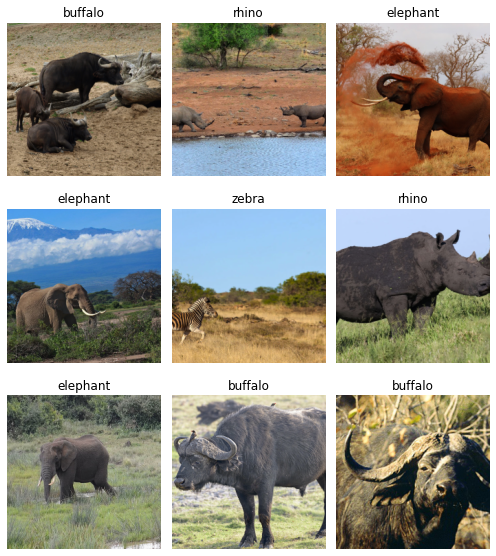

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['buffalo', 'elephant', 'rhino', 'zebra'], 4, 1204, 300)

## Train model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

See the one cycle policy: https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.173822,0.055237,0.023333,00:17
1,0.132273,0.058648,0.016667,00:17
2,0.119033,0.054512,0.020000,00:16
3,0.107956,0.056257,0.020000,00:16


We can get an accuracy of 98.33% with only 2 epochs!

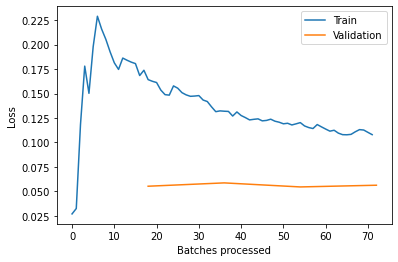

In [13]:
learn.recorder.plot_losses()

In [14]:
learn.save('stage-1')

Let's see if fine tuning the model helps

In [15]:
learn.unfreeze()

In [16]:
# train loss is calculated after every mini batch while valid loss is calculated after every epoch
# lr_find updates lr every mini batch, hence why valid loss is #na#
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


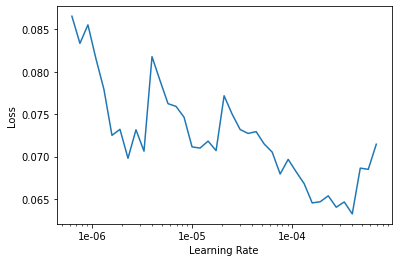

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.090096,0.041161,0.020000,00:17
1,0.077071,0.052939,0.023333,00:16


In [ ]:
# looks like unfreezing did not help, lets load stage 1 again
learn.load('stage-1')

In [20]:
learn.path, learn.model_dir

(PosixPath('/home/peter/Programming/Datasets/African_Wildlife'), 'models')

## Interpretation

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

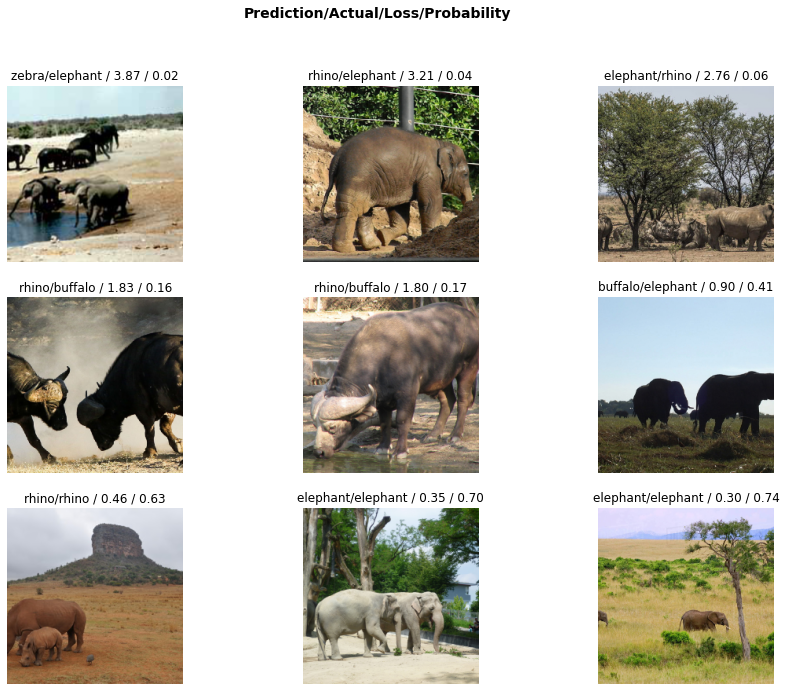

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

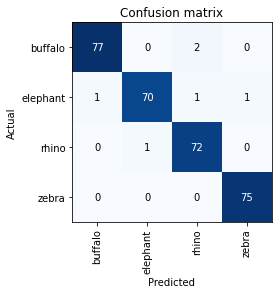

In [23]:
interp.plot_confusion_matrix()

In [24]:
interp.most_confused(min_val=2)

[('buffalo', 'rhino', 2)]

## Export model for production

In [ ]:
learn.export()